In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
import pandas as pd

dataFrame = pd.read_csv('Heart_Disease_Prediction.csv')
dataFrame

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
dataFrame = dataFrame.rename(columns={'Heart Disease': 'Heart_Disease'})


In [ ]:
columns_to_drop = ['Sex', 'BP', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro']
dataFrame = dataFrame.drop(columns_to_drop, axis=1)

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np

dataFrame.columns=['Age', 'Chest pain type', 'Cholesterol', 'Thallium', 'Heart_Disease']
dataFrame.dropna(how="all", inplace=True)
dataFrame

,Age,Chest pain type,Cholesterol,Thallium,Heart_Disease
0,70,4,322,3,Presence
1,67,3,564,7,Absence
2,57,2,261,7,Presence
3,64,4,263,7,Absence
4,74,2,269,3,Absence
...,...,...,...,...,...
265,52,3,199,7,Absence
266,44,2,263,7,Absence
267,56,2,294,3,Absence
268,57,4,192,6,Absence


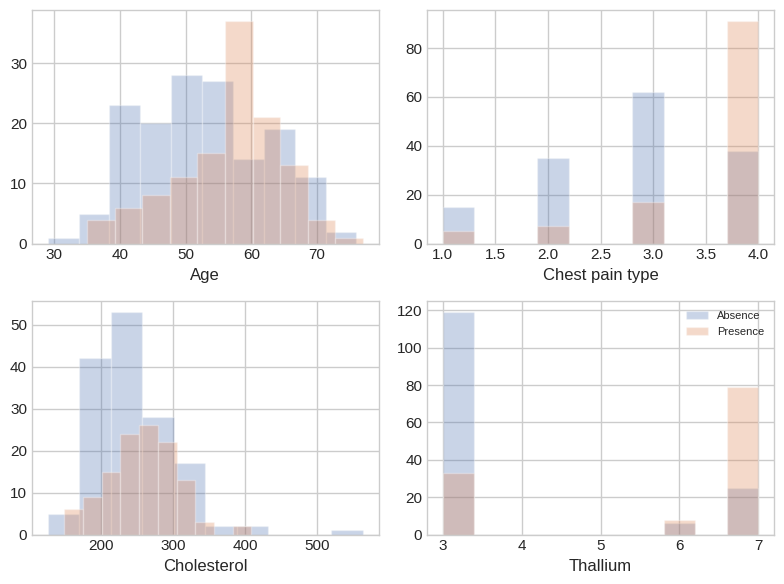

In [ ]:
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = dataFrame.drop(['Heart_Disease'], axis=1)
X = X.values
y = dataFrame['Heart_Disease']
y = y.values





label_dict = {1: 'Absence',
              2: 'Presence'}

feature_dict = {0: 'Age',
                1: 'Chest pain type',
                2: 'Cholesterol',
                3: 'Thallium'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Absence', 'Presence'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [ ]:
x = dataFrame.drop(['Chest pain type', 'Cholesterol', 'Thallium', 'Heart_Disease'], axis=1)
x = sm.add_constant(x, prepend = False)
y = dataFrame['Heart_Disease']

In [ ]:
logit_model=sm.MNLogit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.663930
         Iterations 5
                        Results: MNLogit
Model:              MNLogit          Method:           MLE       
Dependent Variable: Heart_Disease    Pseudo R-squared: 0.034     
Date:               2023-08-25 03:18 AIC:              362.5221  
No. Observations:   270              BIC:              369.7190  
Df Model:           1                Log-Likelihood:   -179.26   
Df Residuals:       268              LL-Null:          -185.48   
Converged:          1.0000           LLR p-value:      0.00042088
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
Heart_Disease = 0  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
              Age  0.0490   0.0143  3.4239 0.0006  0.0210  0.0771
            const -2.9031   0.7962 -3.6462 0.0003 -4.4637 -1.3426

In [ ]:
me = result.get_margeff()

print(me.summary())

       MNLogit Marginal Effects      
Dep. Variable:          Heart_Disease
Method:                          dydx
At:                           overall
 Heart_Disease=Absence      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                       -0.0116      0.003     -3.748      0.000      -0.018      -0.006
------------------------------------------------------------------------------------------
Heart_Disease=Presence      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0116      0.003      3.748      0.000       0.006       0.018


In [ ]:
dataFrame.groupby('Heart_Disease')['Age'].mean()

Heart_Disease
Absence     52.706667
Presence    56.591667
Name: Age, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


x = dataFrame.drop(['Chest pain type', 'Cholesterol', 'Thallium', 'Heart_Disease'], axis=1)
y = dataFrame['Heart_Disease']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

print(x)

     Age
0     70
1     67
2     57
3     64
4     74
..   ...
265   52
266   44
267   56
268   57
269   67

[270 rows x 1 columns]


In [ ]:
reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
reg.fit(trainX, trainY)
y_pred = reg.predict(testX)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.54
Error rate: 0.46


In [ ]:
prob = reg.predict_proba(testX)
prob_array = pd.DataFrame(reg.predict_proba(testX), columns=reg.classes_)
prob_array['prediction'] = y_pred
prob_array['actual'] = testY.to_frame().reset_index().drop(columns='index')

le = preprocessing.LabelEncoder()

prob_array['predicted'] = le.fit_transform(prob_array['prediction'])
prob_array['true'] = le.fit_transform(prob_array['actual'])



prob_array['verify'] = prob_array['true'] - prob_array['predicted']

prob_array['Correct?'] = np.where(prob_array['verify'] == 0, 'True', 'False')
prob_array = prob_array.drop(['predicted', 'true', 'verify'], axis=1)

right = prob_array[(prob_array["Correct?"] == 'True')].shape[0]
wrong = prob_array[(prob_array["Correct?"] == 'False')].shape[0]
total = prob_array["Correct?"].shape[0]

print('Accuracy level is:', (right / total * 100))

Accuracy level is: 53.70370370370371


In [ ]:
wrong = prob_array[(prob_array["Correct?"] == 'False')]
wrong

,Absence,Presence,prediction,actual,Correct?
2,0.512446,0.487554,Absence,Presence,False
3,0.468430,0.531570,Presence,Absence,False
6,0.630523,0.369477,Absence,Presence,False
8,0.534425,0.465575,Absence,Presence,False
9,0.523447,0.476553,Absence,Presence,False
11,0.501434,0.498566,Absence,Presence,False
13,0.382505,0.617495,Presence,Absence,False
15,0.501434,0.498566,Absence,Presence,False
19,0.501434,0.498566,Absence,Presence,False
20,0.457476,0.542524,Presence,Absence,False
